# Anti Money Laundering Detection with GNN node classification

### Part A: Import Library and Data

In [ ]:
import datetime
import os
from typing import Callable, Optional
import pandas as pd
from sklearn import preprocessing
import numpy as np
import torch

from torch_geometric.data import (
    Data,
    InMemoryDataset
)

chooseFileTrain = "HI-Small"
pd.set_option('display.max_columns', None)
path = f'./data/raw/{chooseFileTrain}_Trans.csv'
df = pd.read_csv(path)

c:\Users\jirap\OneDrive\Desktop\Gits\Anti-Money-Laundering-Datamining\venv\lib\site-packages\torch_geometric\__init__.py:4: UserWarning: An issue occurred while importing 'pyg-lib'. Disabling its usage. Stacktrace: Could not load this library: C:\Users\jirap\OneDrive\Desktop\Gits\Anti-Money-Laundering-Datamining\venv\Lib\site-packages\libpyg.pyd
  import torch_geometric.typing
c:\Users\jirap\OneDrive\Desktop\Gits\Anti-Money-Laundering-Datamining\venv\lib\site-packages\torch_geometric\__init__.py:4: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: Could not load this library: C:\Users\jirap\OneDrive\Desktop\Gits\Anti-Money-Laundering-Datamining\venv\Lib\site-packages\torch_sparse\_version_cpu.pyd
  import torch_geometric.typing
c:\Users\jirap\OneDrive\Desktop\Gits\Anti-Money-Laundering-Datamining\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs

### Part B: Data visualization/EDA

In [2]:
print(df.dtypes) #ตรวจสอบ Type Columns

Timestamp              object
From Bank               int64
Account                object
To Bank                 int64
Account.1              object
Amount Received       float64
Receiving Currency     object
Amount Paid           float64
Payment Currency       object
Payment Format         object
Is Laundering           int64
dtype: object


In [3]:
print(df.head()) #ดูตัวอย่างข้อมูล Transation

          Timestamp  From Bank    Account  To Bank  Account.1  \
0  2022/09/01 00:17         20  800104D70       20  800104D70   
1  2022/09/01 00:02       3196  800107150     3196  800107150   
2  2022/09/01 00:17       1208  80010E430     1208  80010E430   
3  2022/09/01 00:03       1208  80010E650       20  80010E6F0   
4  2022/09/01 00:02       1208  80010E650       20  80010EA30   

   Amount Received Receiving Currency  Amount Paid Payment Currency  \
0          6794.63          US Dollar      6794.63        US Dollar   
1          7739.29          US Dollar      7739.29        US Dollar   
2          1880.23          US Dollar      1880.23        US Dollar   
3      73966883.00          US Dollar  73966883.00        US Dollar   
4      45868454.00          US Dollar  45868454.00        US Dollar   

  Payment Format  Is Laundering  
0   Reinvestment              0  
1   Reinvestment              0  
2   Reinvestment              0  
3         Cheque              0  
4         Ch

In [4]:
print(df.isnull().sum()) #ตรวจสอบค่าว่าง

Timestamp             0
From Bank             0
Account               0
To Bank               0
Account.1             0
Amount Received       0
Receiving Currency    0
Amount Paid           0
Payment Currency      0
Payment Format        0
Is Laundering         0
dtype: int64


In [5]:
Tran_Recive_Paid_NotEQ = df.loc[~(df['Amount Received'] == df['Amount Paid'])] #บัญชีที่จำนวนเงินรับไม่เท่ากับจำนวนเงินจ่าย
Tran_Curr_NotEQ = df.loc[~(df['Receiving Currency'] == df['Payment Currency'])] #บัญชีที่สกุลเงินรับไม่เท่ากับสกุลเงินจ่าย
print(Tran_Recive_Paid_NotEQ)
print('-------------------------------------------------------------------------------------------------------------------')
print('-*****************************************************************************************************************-')
print('-------------------------------------------------------------------------------------------------------------------')
print(Tran_Curr_NotEQ)

                 Timestamp  From Bank    Account  To Bank  Account.1  \
268       2022/09/01 00:19       4011  8032D1A00     4011  8032D1A00   
282       2022/09/01 00:13       5991  80341B8B0     5991  80341B8B0   
1577      2022/09/01 00:18          0  800417500        0  800417500   
1926      2022/09/01 00:11       3504  800492D00     3504  800492D00   
5721      2022/09/01 00:29       1488  800C948C0     1488  800C948C0   
...                    ...        ...        ...      ...        ...   
31898037  2022/09/16 23:41      23683  826E63A51    23683  826E63A50   
31898039  2022/09/16 23:54      23683  826E63A51    23683  826E63A50   
31898140  2022/09/16 23:35     212191  807D21161   212191  807D21160   
31898142  2022/09/16 23:55     212191  807D21161   212191  807D21160   
31898154  2022/09/16 23:45      18289  80A045101    18289  80A045100   

          Amount Received Receiving Currency  Amount Paid Payment Currency  \
268             97.270000               Euro       113.98

In [7]:
not_equal1 = df.loc[~(df['Amount Received'] == df['Amount Paid'])]
not_equal2 = df.loc[~(df['Receiving Currency'] == df['Payment Currency'])]
print(not_equal1)
print('---------------------------------------------------------------------------')
print(not_equal2)

                 Timestamp  From Bank    Account  To Bank  Account.1  \
268       2022/09/01 00:19       4011  8032D1A00     4011  8032D1A00   
282       2022/09/01 00:13       5991  80341B8B0     5991  80341B8B0   
1577      2022/09/01 00:18          0  800417500        0  800417500   
1926      2022/09/01 00:11       3504  800492D00     3504  800492D00   
5721      2022/09/01 00:29       1488  800C948C0     1488  800C948C0   
...                    ...        ...        ...      ...        ...   
31898037  2022/09/16 23:41      23683  826E63A51    23683  826E63A50   
31898039  2022/09/16 23:54      23683  826E63A51    23683  826E63A50   
31898140  2022/09/16 23:35     212191  807D21161   212191  807D21160   
31898142  2022/09/16 23:55     212191  807D21161   212191  807D21160   
31898154  2022/09/16 23:45      18289  80A045101    18289  80A045100   

          Amount Received Receiving Currency  Amount Paid Payment Currency  \
268             97.270000               Euro       113.98

จากขนาดสอง df แสดงว่ามีค่าธรรมเนียมการแปลงและการแปลงระหว่างสกุลเงินที่แตกต่างกัน เราไม่สามารถรวม/ลดคอลัมน์จำนวนเงินได้ หากเราจะ Encoding จะต้องเป็นรายการที่สกุลเงินรับและสกุลเงินการชำระเงินเหมือนกัน

In [8]:
#สกุลเงินที่มีในข้อมูลที่ใช้ทั้งีรับและจ่าย
print(sorted(df['Receiving Currency'].unique()))
print(sorted(df['Payment Currency'].unique()))

['Australian Dollar', 'Bitcoin', 'Brazil Real', 'Canadian Dollar', 'Euro', 'Mexican Peso', 'Ruble', 'Rupee', 'Saudi Riyal', 'Shekel', 'Swiss Franc', 'UK Pound', 'US Dollar', 'Yen', 'Yuan']
['Australian Dollar', 'Bitcoin', 'Brazil Real', 'Canadian Dollar', 'Euro', 'Mexican Peso', 'Ruble', 'Rupee', 'Saudi Riyal', 'Shekel', 'Swiss Franc', 'UK Pound', 'US Dollar', 'Yen', 'Yuan']


### Part C: Data Preprocessing

ในการประมวลผลข้อมูลเบื้องต้น เราจะทำการแปลงข้อมูลดังต่อไปนี้:
1. แปลงค่า Timestamp ด้วยค่า min max normalization
2. สร้าง ID เฉพาะสำหรับแต่ละบัญชีโดยเพิ่มรหัสธนาคารและหมายเลขบัญชี
3. สร้าง receiving_df พร้อมข้อมูลบัญชีรับ จำนวนเงินที่ได้รับ และสกุลเงิน
4. สร้าง waiting_df พร้อมข้อมูลบัญชีผู้จ่าย จำนวนเงินที่จ่าย และสกุลเงิน
5. สร้างรายการสกุลเงินที่ใช้ในการทำธุรกรรมทั้งหมด
6. ระบุชื่อ 'Payment Format', 'Payment Currency', 'Receiving Currency' ตามคลาสต่างๆ ด้วย sklearn LabelEncoder

In [9]:
# ฟังก์ชันสำหรับเข้ารหัส (Label Encoding) ค่าที่เป็นข้อความ (categorical columns)
def df_label_encoder(df, columns):
    # สร้างอ็อบเจกต์ LabelEncoder จาก sklearn
    le = preprocessing.LabelEncoder()

    # วนลูปเข้ารหัสทุกคอลัมน์ที่ระบุ
    for i in columns:
        # แปลงค่าทั้งหมดในคอลัมน์เป็น string แล้วเข้ารหัสเป็นตัวเลข
        df[i] = le.fit_transform(df[i].astype(str))
    
    # คืนค่า DataFrame หลังจากเข้ารหัสแล้ว
    return df


# ฟังก์ชันสำหรับเตรียมข้อมูลก่อนนำเข้าโมเดล (Data Preprocessing)
def preprocess(df):
    # 1 เข้ารหัสคอลัมน์ที่เป็นข้อความ (Payment Format, Payment Currency, Receiving Currency)
    df = df_label_encoder(df, ['Payment Format', 'Payment Currency', 'Receiving Currency'])

    # 2️ แปลงคอลัมน์ Timestamp จาก string → datetime object
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])

    # 3️ แปลง Timestamp เป็นค่าตัวเลข (จำนวน nanoseconds นับจาก epoch)
    df['Timestamp'] = df['Timestamp'].apply(lambda x: x.value)

    # 4️ ทำการ Normalize ค่า Timestamp ให้อยู่ในช่วง [0, 1]
    df['Timestamp'] = (df['Timestamp'] - df['Timestamp'].min()) / (df['Timestamp'].max() - df['Timestamp'].min())

    # 5️ รวมรหัสธนาคารกับหมายเลขบัญชีเพื่อสร้างรหัสบัญชีที่ไม่ซ้ำ (unique account ID)
    # เช่น "11" (From Bank) + "_" + "8000ECA90" (Account) → "11_8000ECA90"
    df['Account'] = df['From Bank'].astype(str) + '_' + df['Account']
    df['Account.1'] = df['To Bank'].astype(str) + '_' + df['Account.1']

    # 6️ เรียงลำดับข้อมูลตามชื่อบัญชี เพื่อให้ข้อมูลมีลำดับที่คงที่
    df = df.sort_values(by=['Account'])

    # 7️ สร้าง DataFrame ของบัญชีผู้รับ (receiving_df)
    # มีข้อมูล: บัญชีผู้รับ, จำนวนเงินที่ได้รับ, และรหัสสกุลเงิน
    receiving_df = df[['Account.1', 'Amount Received', 'Receiving Currency']]

    # 8️ สร้าง DataFrame ของบัญชีผู้จ่าย (paying_df)
    # มีข้อมูล: บัญชีผู้จ่าย, จำนวนเงินที่จ่าย, และรหัสสกุลเงิน
    paying_df = df[['Account', 'Amount Paid', 'Payment Currency']]

    # 9️ เปลี่ยนชื่อคอลัมน์ Account.1 → Account เพื่อให้ชื่อสอดคล้องกับฝั่งผู้จ่าย
    receiving_df = receiving_df.rename({'Account.1': 'Account'}, axis=1)

    #  ดึงรายการสกุลเงินทั้งหมดที่ปรากฏในข้อมูล และจัดเรียงให้อยู่ในลำดับคงที่
    currency_ls = sorted(df['Receiving Currency'].unique())

    return df, receiving_df, paying_df, currency_ls


In [10]:
df, receiving_df, paying_df, currency_ls = preprocess(df = df)
print(df.head())

          Timestamp  From Bank      Account  To Bank        Account.1  \
23884118   0.448341          0  0_8000474C0     1208   1208_80013C440   
31285534   0.571063          0  0_8000474C0    13146  13146_807E93C90   
5578585    0.049325          0  0_8000474C0     2310   2310_80032A7A0   
16716646   0.286335          0  0_8000474C0       20     20_80022BC40   
31285533   0.571540          0  0_8000474C0    13146  13146_807E93C90   

          Amount Received  Receiving Currency  Amount Paid  Payment Currency  \
23884118           564.35                  12       564.35                12   
31285534          3575.69                  12      3575.69                12   
5578585            478.10                  12       478.10                12   
16716646          1127.66                  12      1127.66                12   
31285533          2480.26                  12      2480.26                12   

          Payment Format  Is Laundering  
23884118               0              

In [11]:
print(receiving_df.head())
print(paying_df.head())

                  Account  Amount Received  Receiving Currency
23884118   1208_80013C440           564.35                  12
31285534  13146_807E93C90          3575.69                  12
5578585    2310_80032A7A0           478.10                  12
16716646     20_80022BC40          1127.66                  12
31285533  13146_807E93C90          2480.26                  12
              Account  Amount Paid  Payment Currency
23884118  0_8000474C0       564.35                12
31285534  0_8000474C0      3575.69                12
5578585   0_8000474C0       478.10                12
16716646  0_8000474C0      1127.66                12
31285533  0_8000474C0      2480.26                12


currency_ls:

In [12]:
print(currency_ls)

[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14)]


เราต้องการแยกบัญชีเฉพาะทั้งหมดจากผู้ชำระเงินและผู้รับเป็นโหนดในกราฟของเรา ซึ่งประกอบด้วยรหัสบัญชีเฉพาะ รหัสธนาคาร และป้ายกำกับ 'Is Laundering'
ในส่วนนี้ เราถือว่าทั้งผู้ชำระเงินและผู้รับมีส่วนเกี่ยวข้องกับธุรกรรมที่ผิดกฎหมายเป็นบัญชีที่น่าสงสัย เราจะติดป้ายกำกับบัญชีทั้งสองด้วย 'Is Laundering' == 1

In [13]:
def get_all_account(df):
    """
    ฟังก์ชันนี้มีหน้าที่รวบรวมบัญชีทั้งหมดจากทั้งฝั่งผู้โอน (payer) และผู้รับ (receiver)
    เพื่อสร้างรายการบัญชีที่ใช้เป็นโหนด (nodes) ในกราฟของระบบตรวจจับการฟอกเงิน
    พร้อมกำหนดค่าป้ายกำกับ (label) ให้แต่ละบัญชีว่าเป็นบัญชีปกติ (0) หรือเป็นบัญชีที่เกี่ยวข้องกับการฟอกเงิน (1)
    """
    
    #ดึงเฉพาะข้อมูลฝั่งผู้โอน (payer) ประกอบด้วย Account และรหัสธนาคารต้นทาง
    ldf = df[['Account', 'From Bank']]

    # ดึงเฉพาะข้อมูลฝั่งผู้รับ (receiver) ประกอบด้วย Account.1 และรหัสธนาคารปลายทาง
    rdf = df[['Account.1', 'To Bank']]

    # เลือกเฉพาะธุรกรรมที่มีการฟอกเงิน (Is Laundering == 1)
    suspicious = df[df['Is Laundering'] == 1]

    # ดึงบัญชีฝั่งผู้โอนที่อยู่ในธุรกรรมฟอกเงิน
    s1 = suspicious[['Account', 'Is Laundering']]

    # ดึงบัญชีฝั่งผู้รับที่อยู่ในธุรกรรมฟอกเงิน
    s2 = suspicious[['Account.1', 'Is Laundering']]

    # เปลี่ยนชื่อคอลัมน์ 'Account.1' เป็น 'Account'
    # เพื่อให้ชื่อคอลัมน์ของ s2 สอดคล้องกับ s1 สำหรับการรวมกันภายหลัง
    s2 = s2.rename({'Account.1': 'Account'}, axis=1)

    # รวมข้อมูลบัญชีผู้โอนและผู้รับที่เกี่ยวข้องกับฟอกเงินเข้าด้วยกัน
    suspicious = pd.concat([s1, s2], join='outer')

    # ลบบัญชีซ้ำออก เพื่อให้เหลือบัญชีที่น่าสงสัยแต่ละบัญชีเพียง 1 ครั้ง
    suspicious = suspicious.drop_duplicates()


    # เปลี่ยนชื่อคอลัมน์ของ ldf และ rdf ให้เป็นชื่อเดียวกัน (Bank, Account)
    # จากนั้นเราจะรวมบัญชีฝั่งผู้โอนและผู้รับทั้งหมดเข้าด้วยกัน
    ldf = ldf.rename({'From Bank': 'Bank'}, axis=1)
    rdf = rdf.rename({'Account.1': 'Account', 'To Bank': 'Bank'}, axis=1)

    # รวมตารางฝั่งผู้โอนและผู้รับทั้งหมดเป็นตารางเดียว (รวมทุกบัญชีที่เคยปรากฏในระบบ)
    df = pd.concat([ldf, rdf], join='outer')

    # ลบบัญชีซ้ำ (เช่น บัญชีที่เคยเป็นทั้งผู้โอนและผู้รับ)
    df = df.drop_duplicates()


    #  เริ่มต้นกำหนดคอลัมน์ 'Is Laundering' ให้ทุกบัญชีเป็น 0 (ถือว่าปกติ)
    df['Is Laundering'] = 0

    # ตั้ง 'Account' เป็น index เพื่อให้ update ข้อมูลตามชื่อบัญชีได้ง่าย
    df.set_index('Account', inplace=True)

    #  อัปเดตค่าของบัญชีที่น่าสงสัย (จาก suspicious DataFrame)
    # โดยจะเขียนทับเฉพาะบัญชีที่อยู่ในรายการฟอกเงิน (Is Laundering = 1)
    df.update(suspicious.set_index('Account'))

    # รีเซ็ต index กลับมาเป็นคอลัมน์ปกติ
    df = df.reset_index()

    return df


In [14]:
accounts = get_all_account(df)
print(accounts.head())

       Account  Bank  Is Laundering
0  0_8000474C0     0              0
1  0_800047930     0              0
2  0_80006C140     0              0
3  0_80006DFE0     0              1
4  0_80006F150     0              0


### Part D: Node features


เราต้องการรวบรวมค่าเฉลี่ยของจำนวนเงินที่ชำระและได้รับพร้อมกับสกุลเงินประเภทต่างๆ เป็นฟีเจอร์ใหม่ของแต่ละโหนด

In [15]:
def paid_currency_aggregate(currency_ls, paying_df, accounts):
    """
    ฟังก์ชันนี้มีหน้าที่คำนวณค่าเฉลี่ยของจำนวนเงินที่ 'จ่ายออก' (Amount Paid)
    แยกตามแต่ละสกุลเงิน (Payment Currency)
    แล้วเพิ่มเป็นคอลัมน์ใหม่ให้กับ DataFrame ของบัญชี (accounts)
    """
    # วนลูปผ่านทุกสกุลเงินในรายการ
    for i in currency_ls:
        # เลือกเฉพาะธุรกรรมที่มีสกุลเงินตรงกับค่าปัจจุบัน i
        temp = paying_df[paying_df['Payment Currency'] == i]

        # คำนวณค่าเฉลี่ยของ Amount Paid ต่อบัญชี (Account)
        # แล้วเพิ่มผลลัพธ์เป็นคอลัมน์ใหม่ใน accounts
        accounts['avg paid ' + str(i)] = temp['Amount Paid'].groupby(temp['Account']).transform('mean')
    
    return accounts


def received_currency_aggregate(currency_ls, receiving_df, accounts):
    """
    ฟังก์ชันนี้มีหน้าที่คำนวณค่าเฉลี่ยของจำนวนเงินที่ 'ได้รับ' (Amount Received)
    แยกตามแต่ละสกุลเงิน (Receiving Currency)
    แล้วเพิ่มเป็นคอลัมน์ใหม่ให้กับ DataFrame ของบัญชี (accounts)
    """
    # วนลูปผ่านทุกสกุลเงินในรายการ
    for i in currency_ls:
        # เลือกเฉพาะธุรกรรมที่มีสกุลเงินตรงกับค่าปัจจุบัน i
        temp = receiving_df[receiving_df['Receiving Currency'] == i]

        # คำนวณค่าเฉลี่ยของ Amount Received ต่อบัญชี (Account)
        # แล้วเพิ่มผลลัพธ์เป็นคอลัมน์ใหม่ใน accounts
        accounts['avg received ' + str(i)] = temp['Amount Received'].groupby(temp['Account']).transform('mean')
    
    # เติมค่าที่หายไป (NaN) ด้วย 0 เพื่อป้องกันปัญหาขณะนำไปใช้กับโมเดล
    accounts = accounts.fillna(0)

    return accounts


เราสามารถกำหนดแอตทริบิวต์ของโหนดโดยใช้รหัสธนาคารและค่าเฉลี่ยของจำนวนเงินที่ชำระและรับด้วยสกุลเงินประเภทต่างๆ


In [16]:
def get_node_attr(currency_ls, paying_df, receiving_df, accounts):
    """
    ฟังก์ชันนี้มีหน้าที่สร้าง "คุณลักษณะของโหนด (Node Attributes)" 
    และ "ป้ายกำกับของโหนด (Node Labels)" สำหรับแต่ละบัญชี
    เพื่อนำไปใช้เป็นข้อมูลป้อนเข้าโมเดลกราฟ (Graph Neural Network)
    """

    # ขั้นตอนที่ 1: รวมฟีเจอร์การจ่ายเงินของแต่ละบัญชีตามสกุลเงิน
    node_df = paid_currency_aggregate(currency_ls, paying_df, accounts)

    # ขั้นตอนที่ 2: รวมฟีเจอร์การรับเงินของแต่ละบัญชีตามสกุลเงิน
    node_df = received_currency_aggregate(currency_ls, receiving_df, node_df)

    # ขั้นตอนที่ 3: แปลงค่าป้ายกำกับ (Is Laundering) ให้เป็น tensor ของ PyTorch
    # ใช้ torch.float เพื่อให้สามารถใช้กับฟังก์ชัน Loss ได้
    node_label = torch.from_numpy(node_df['Is Laundering'].values).to(torch.float)

    # ขั้นตอนที่ 4: ลบคอลัมน์ที่ไม่ต้องใช้ในการเทรนโมเดลออก (Account, Is Laundering)
    node_df = node_df.drop(['Account', 'Is Laundering'], axis=1)

    # ขั้นตอนที่ 5: เข้ารหัส (Label Encoding) คอลัมน์ 'Bank' 
    # เพื่อให้รหัสธนาคารเป็นค่าตัวเลขที่โมเดลเข้าใจได้
    node_df = df_label_encoder(node_df, ['Bank'])

    # node_df = torch.from_numpy(node_df.values).to(torch.float)

    return node_df, node_label


In [17]:
node_df, node_label = get_node_attr(currency_ls, paying_df,receiving_df, accounts)
print(node_df.head())

   Bank  avg paid 0  avg paid 1  avg paid 2  avg paid 3  avg paid 4  \
0     0         0.0         0.0         0.0         0.0         0.0   
1     0         0.0         0.0         0.0         0.0         0.0   
2     0         0.0         0.0         0.0         0.0         0.0   
3     0         0.0         0.0         0.0         0.0         0.0   
4     0         0.0         0.0         0.0         0.0         0.0   

   avg paid 5  avg paid 6  avg paid 7  avg paid 8  avg paid 9  avg paid 10  \
0         0.0         0.0         0.0         0.0         0.0          0.0   
1         0.0         0.0         0.0         0.0         0.0          0.0   
2         0.0         0.0         0.0         0.0         0.0          0.0   
3         0.0         0.0         0.0         0.0         0.0          0.0   
4         0.0         0.0         0.0         0.0         0.0          0.0   

   avg paid 11   avg paid 12  avg paid 13  avg paid 14  avg received 0  \
0          0.0  2.147285e+03  

### Part F: Edge features

สำหรับแอตทริบิวต์ Edge เราใช้ 'Timestamp', 'Amount Received', 'Receiving Currency', 'Amount Paid', 'Payment Currency' และ 'Payment Format'


In [18]:
def get_edge_df(accounts, df):
    """
    ฟังก์ชันนี้มีหน้าที่สร้างข้อมูลของ "ขอบของกราฟ (edges)" 
    สำหรับโมเดลกราฟ (Graph Neural Network) โดยแปลงข้อมูลธุรกรรมแต่ละรายการ 
    ให้กลายเป็นขอบระหว่างโหนดต้นทาง (ผู้โอน) และโหนดปลายทาง (ผู้รับ)
    """

    # ขั้นตอนที่ 1: รีเซ็ต index ของ accounts เพื่อให้แน่ใจว่า index เรียงลำดับใหม่จาก 0
    accounts = accounts.reset_index(drop=True)

    # ขั้นตอนที่ 2: สร้างคอลัมน์ 'ID' โดยใช้ค่า index เป็นรหัสของแต่ละบัญชี
    accounts['ID'] = accounts.index

    # ขั้นตอนที่ 3: สร้างพจนานุกรม (dictionary) สำหรับ map จากชื่อบัญชี → หมายเลข ID
    mapping_dict = dict(zip(accounts['Account'], accounts['ID']))

    # ขั้นตอนที่ 4: ใช้ mapping_dict เพื่อแปลงชื่อบัญชีในธุรกรรม
    # ให้กลายเป็นหมายเลข ID ของบัญชีต้นทาง (From) และปลายทาง (To)
    df['From'] = df['Account'].map(mapping_dict)
    df['To'] = df['Account.1'].map(mapping_dict)

    # ขั้นตอนที่ 5: ลบคอลัมน์ที่ไม่จำเป็นสำหรับการสร้างกราฟออก
    # (เช่น Account ชื่อจริง, รหัสธนาคารต้นทาง/ปลายทาง)
    df = df.drop(['Account', 'Account.1', 'From Bank', 'To Bank'], axis=1)

    # ขั้นตอนที่ 6: สร้าง tensor edge_index ที่เก็บคู่ (from, to) ของแต่ละธุรกรรม
    # shape = [2, จำนวนธุรกรรมทั้งหมด]
    edge_index = torch.stack([
        torch.from_numpy(df['From'].values),
        torch.from_numpy(df['To'].values)
    ], dim=0)

    # ขั้นตอนที่ 7: ลบคอลัมน์ที่ไม่ต้องการใน edge attribute
    # เช่น Is Laundering (label ของโหนด), และ index mapping ชั่วคราว
    df = df.drop(['Is Laundering', 'From', 'To'], axis=1)

    # edge_attr = torch.from_numpy(df.values).to(torch.float)

    # ใช้ DataFrame ดิบเป็น edge_attr แทน (เพื่อดูค่าได้ง่ายขณะทดลอง)
    edge_attr = df

    return edge_attr, edge_index


edge_attr:

In [19]:
edge_attr, edge_index = get_edge_df(accounts, df)
print(edge_attr.head())

          Timestamp  Amount Received  Receiving Currency  Amount Paid  \
23884118   0.448341           564.35                  12       564.35   
31285534   0.571063          3575.69                  12      3575.69   
5578585    0.049325           478.10                  12       478.10   
16716646   0.286335          1127.66                  12      1127.66   
31285533   0.571540          2480.26                  12      2480.26   

          Payment Currency  Payment Format  
23884118                12               0  
31285534                12               6  
5578585                 12               4  
16716646                12               3  
31285533                12               3  


edge_index:

In [20]:
print(edge_index)

tensor([[      0,       0,       0,  ..., 2013637, 2013638, 2013638],
        [ 260376,  350171,  984539,  ..., 2013637, 2013638, 2013638]])


### Part G: Modeling 


In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch_geometric.transforms as T
from torch_geometric.nn import GATConv, Linear

class GAT(torch.nn.Module):
    """
    คลาสนี้เป็นการนิยามโมเดล Graph Attention Network (GAT)
    สำหรับงานจำแนกโหนด (Node Classification) เพื่อระบุว่าบัญชีใดมีพฤติกรรมฟอกเงินหรือไม่

    โครงสร้างโมเดล:
        - GATConv ชั้นที่ 1: เรียนรู้ความสัมพันธ์ระหว่างโหนด (ด้วย attention)
        - GATConv ชั้นที่ 2: ย่อยข้อมูลที่ผ่านการเรียนรู้จากชั้นแรก
        - Linear: แปลงข้อมูลที่ได้เป็นผลลัพธ์สำหรับการจำแนก
        - Sigmoid: ทำให้ออกมาเป็นค่าความน่าจะเป็น (0–1)
    """

    def __init__(self, in_channels, hidden_channels, out_channels, heads):
        # เรียกใช้ constructor ของคลาสแม่ (torch.nn.Module)
        super().__init__()

        # ชั้นแรกของ GAT: ใช้ attention หลายหัว (multi-head attention)
        # เพื่อให้โมเดลเรียนรู้การเชื่อมโยงระหว่างโหนดที่ซับซ้อนได้ดีขึ้น
        self.conv1 = GATConv(
            in_channels,       # จำนวนฟีเจอร์อินพุตของโหนด
            hidden_channels,   # จำนวนฟีเจอร์เอาต์พุตหลังชั้นนี้
            heads,             # จำนวน attention heads
            dropout=0.6        # dropout ระหว่างการเรียนรู้
        )

        # ชั้นที่สองของ GAT: ลดขนาดของฟีเจอร์ (hidden_channels/4)
        # concat=False หมายความว่า output จากหลาย heads จะถูกเฉลี่ยรวมกัน
        self.conv2 = GATConv(
            hidden_channels * heads,  # input = output จากชั้นแรก (รวมทุก head)
            int(hidden_channels / 4), # ลดมิติลงเพื่อป้องกัน overfitting
            heads=1,                  # ใช้ head เดียวพอในชั้นที่สอง
            concat=False,             # ไม่ต่อผลของหลายหัวเข้าด้วยกัน
            dropout=0.6
        )

        # เลเยอร์ Linear: แปลงฟีเจอร์จาก GATConv สุดท้ายให้เป็นขนาดที่ต้องการ (out_channels)
        self.lin = Linear(int(hidden_channels / 4), out_channels)

        # Sigmoid: แปลงค่าเอาต์พุตสุดท้ายให้อยู่ในช่วง [0, 1] (เหมาะกับ binary classification)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x, edge_index, edge_attr):
        """
        ฟังก์ชัน forward() คือการกำหนดลำดับขั้นตอนการไหลของข้อมูลในโมเดล
        โดยรับข้อมูลของกราฟแล้วส่งผ่านแต่ละเลเยอร์
        """

        # ขั้นตอนที่ 1: Dropout เพื่อป้องกัน overfitting
        x = F.dropout(x, p=0.6, training=self.training)

        # ขั้นตอนที่ 2: ผ่าน GATConv ชั้นที่ 1 พร้อมฟังก์ชันกระตุ้น ELU
        x = F.elu(self.conv1(x, edge_index, edge_attr))

        # ขั้นตอนที่ 3: Dropout อีกครั้งเพื่อเพิ่มความทนต่อ overfitting
        x = F.dropout(x, p=0.6, training=self.training)

        # ขั้นตอนที่ 4: ผ่าน GATConv ชั้นที่ 2 พร้อมฟังก์ชัน ELU
        x = F.elu(self.conv2(x, edge_index, edge_attr))

        # ขั้นตอนที่ 5: ผ่านเลเยอร์ Linear เพื่อให้ได้ขนาดเอาต์พุตสุดท้าย
        x = self.lin(x)

        # ขั้นตอนที่ 6: ใช้ Sigmoid เพื่อแปลงให้อยู่ในช่วง [0, 1]
        x = self.sigmoid(x)

        # คืนค่าผลลัพธ์สุดท้าย
        return x


PyG InMemoryDataset


In [22]:
class AMLtoGraph(InMemoryDataset):
    """
    คลาสนี้ใช้สำหรับสร้างชุดข้อมูลกราฟ (Graph Dataset)
    จากข้อมูลธุรกรรมทางการเงิน เพื่อนำไปใช้เทรนโมเดลตรวจจับการฟอกเงิน (GNN)

    การทำงานหลักของคลาสนี้:
        1. โหลดข้อมูล CSV ดิบ
        2. ทำการแปลงและเตรียมข้อมูล (Preprocess)
        3. สร้างโหนด (Nodes) จากบัญชีทั้งหมด
        4. สร้างขอบ (Edges) จากธุรกรรมแต่ละรายการ
        5. สร้างฟีเจอร์ของโหนดและขอบ (Attributes)
        6. รวมทั้งหมดเป็นอ็อบเจกต์ของ PyTorch Geometric Data
    """

    def __init__(self, root: str, edge_window_size: int = 10,
                 transform: Optional[Callable] = None,
                 pre_transform: Optional[Callable] = None):
        # บันทึกค่า edge_window_size ไว้ในคลาส
        self.edge_window_size = edge_window_size

        # เรียกใช้งาน constructor ของคลาสแม่ InMemoryDataset
        super().__init__(root, transform, pre_transform)

        # โหลดข้อมูลที่ประมวลผลไว้แล้ว (processed data) จากไฟล์ data.pt
        self.data, self.slices = torch.load(self.processed_paths[0], weights_only=False)

    # ------------------------------------------------------------
    # ส่วนกำหนดชื่อไฟล์ที่ใช้ (สำหรับระบบของ PyTorch Geometric)
    # ------------------------------------------------------------
    @property
    def raw_file_names(self) -> str:
        # ชื่อไฟล์ข้อมูลต้นฉบับ (ต้องอยู่ในโฟลเดอร์ raw/)
        return 'LI-Small_Trans.csv'

    @property
    def processed_file_names(self) -> str:
        # ชื่อไฟล์ที่เก็บข้อมูลหลังประมวลผลเสร็จแล้ว
        return 'data.pt'

    @property
    def num_nodes(self) -> int:
        # จำนวนโหนดทั้งหมดในกราฟ
        # โดยดูจากหมายเลขโหนดสูงสุดใน edge_index + 1
        return self._data.edge_index.max().item() + 1

    # ------------------------------------------------------------
    # ฟังก์ชันย่อย: เข้ารหัสข้อมูลเชิงหมวดหมู่เป็นตัวเลข
    # ------------------------------------------------------------
    def df_label_encoder(self, df, columns):
        le = preprocessing.LabelEncoder()
        for i in columns:
            df[i] = le.fit_transform(df[i].astype(str))
        return df

    # ------------------------------------------------------------
    # ฟังก์ชันย่อย: เตรียมข้อมูล (Preprocessing)
    # ------------------------------------------------------------
    def preprocess(self, df):
        # เข้ารหัสคอลัมน์เชิงหมวดหมู่ (เช่น สกุลเงิน, รูปแบบการชำระเงิน)
        df = self.df_label_encoder(df, ['Payment Format', 'Payment Currency', 'Receiving Currency'])

        # แปลงเวลาเป็น datetime และ normalize ให้อยู่ในช่วง [0, 1]
        df['Timestamp'] = pd.to_datetime(df['Timestamp'])
        df['Timestamp'] = df['Timestamp'].apply(lambda x: x.value)
        df['Timestamp'] = (df['Timestamp'] - df['Timestamp'].min()) / (df['Timestamp'].max() - df['Timestamp'].min())

        # รวมรหัสธนาคารกับหมายเลขบัญชี เพื่อสร้างรหัสบัญชีไม่ซ้ำ
        df['Account'] = df['From Bank'].astype(str) + '_' + df['Account']
        df['Account.1'] = df['To Bank'].astype(str) + '_' + df['Account.1']

        # เรียงข้อมูลตามชื่อบัญชีเพื่อความสม่ำเสมอ
        df = df.sort_values(by=['Account'])

        # แยกข้อมูลฝั่งผู้รับและผู้จ่ายออกมา
        receiving_df = df[['Account.1', 'Amount Received', 'Receiving Currency']]
        paying_df = df[['Account', 'Amount Paid', 'Payment Currency']]

        # เปลี่ยนชื่อคอลัมน์ Account.1 → Account เพื่อให้ชื่อสอดคล้องกัน
        receiving_df = receiving_df.rename({'Account.1': 'Account'}, axis=1)

        # เก็บรายการรหัสสกุลเงินทั้งหมด
        currency_ls = sorted(df['Receiving Currency'].unique())

        return df, receiving_df, paying_df, currency_ls

    # ------------------------------------------------------------
    # ฟังก์ชันย่อย: สร้างตารางบัญชีทั้งหมด (Nodes)
    # ------------------------------------------------------------
    def get_all_account(self, df):
        # ดึงข้อมูลบัญชีจากฝั่งผู้โอนและผู้รับ
        ldf = df[['Account', 'From Bank']]
        rdf = df[['Account.1', 'To Bank']]

        # ดึงธุรกรรมที่ถูกระบุว่าฟอกเงิน
        suspicious = df[df['Is Laundering'] == 1]
        s1 = suspicious[['Account', 'Is Laundering']]
        s2 = suspicious[['Account.1', 'Is Laundering']]
        s2 = s2.rename({'Account.1': 'Account'}, axis=1)
        suspicious = pd.concat([s1, s2], join='outer').drop_duplicates()

        # รวมข้อมูลผู้โอนและผู้รับทั้งหมด
        ldf = ldf.rename({'From Bank': 'Bank'}, axis=1)
        rdf = rdf.rename({'Account.1': 'Account', 'To Bank': 'Bank'}, axis=1)
        df = pd.concat([ldf, rdf], join='outer').drop_duplicates()

        # เพิ่มคอลัมน์ Is Laundering เริ่มต้นเป็น 0
        df['Is Laundering'] = 0

        # อัปเดตค่าของบัญชีที่เกี่ยวข้องกับการฟอกเงินให้เป็น 1
        df.set_index('Account', inplace=True)
        df.update(suspicious.set_index('Account'))
        df = df.reset_index()
        return df

    # ------------------------------------------------------------
    # ฟังก์ชันย่อย: คำนวณค่าเฉลี่ยการจ่ายเงินแยกตามสกุลเงิน
    # ------------------------------------------------------------
    def paid_currency_aggregate(self, currency_ls, paying_df, accounts):
        for i in currency_ls:
            temp = paying_df[paying_df['Payment Currency'] == i]
            accounts['avg paid ' + str(i)] = temp['Amount Paid'].groupby(temp['Account']).transform('mean')
        return accounts

    # ------------------------------------------------------------
    # ฟังก์ชันย่อย: คำนวณค่าเฉลี่ยการรับเงินแยกตามสกุลเงิน
    # ------------------------------------------------------------
    def received_currency_aggregate(self, currency_ls, receiving_df, accounts):
        for i in currency_ls:
            temp = receiving_df[receiving_df['Receiving Currency'] == i]
            accounts['avg received ' + str(i)] = temp['Amount Received'].groupby(temp['Account']).transform('mean')
        accounts = accounts.fillna(0)
        return accounts

    # ------------------------------------------------------------
    # ฟังก์ชันย่อย: สร้างข้อมูลขอบ (Edges)
    # ------------------------------------------------------------
    def get_edge_df(self, accounts, df):
        accounts = accounts.reset_index(drop=True)
        accounts['ID'] = accounts.index
        mapping_dict = dict(zip(accounts['Account'], accounts['ID']))

        # แปลงชื่อบัญชีในธุรกรรมให้เป็นหมายเลข ID
        df['From'] = df['Account'].map(mapping_dict)
        df['To'] = df['Account.1'].map(mapping_dict)

        # ลบคอลัมน์ที่ไม่จำเป็น
        df = df.drop(['Account', 'Account.1', 'From Bank', 'To Bank'], axis=1)

        # สร้าง tensor edge_index ที่เก็บคู่ (from, to)
        edge_index = torch.stack([
            torch.from_numpy(df['From'].values),
            torch.from_numpy(df['To'].values)
        ], dim=0)

        # ลบคอลัมน์ที่ไม่ต้องการออกจาก edge attribute
        df = df.drop(['Is Laundering', 'From', 'To'], axis=1)

        # แปลงค่า edge attributes เป็น tensor ของตัวเลขแบบ float
        edge_attr = torch.from_numpy(df.values).to(torch.float)
        return edge_attr, edge_index

    # ------------------------------------------------------------
    # ฟังก์ชันย่อย: สร้างฟีเจอร์และ label ของโหนด
    # ------------------------------------------------------------
    def get_node_attr(self, currency_ls, paying_df, receiving_df, accounts):
        node_df = self.paid_currency_aggregate(currency_ls, paying_df, accounts)
        node_df = self.received_currency_aggregate(currency_ls, receiving_df, node_df)

        # Label ของโหนด (0 = ปกติ, 1 = ฟอกเงิน)
        node_label = torch.from_numpy(node_df['Is Laundering'].values).to(torch.float)

        # ลบคอลัมน์ที่ไม่ใช้
        node_df = node_df.drop(['Account', 'Is Laundering'], axis=1)

        # เข้ารหัสคอลัมน์ 'Bank' เป็นตัวเลข
        node_df = self.df_label_encoder(node_df, ['Bank'])

        # แปลงข้อมูลฟีเจอร์เป็น tensor
        node_df = torch.from_numpy(node_df.values).to(torch.float)
        return node_df, node_label

    # ------------------------------------------------------------
    # ฟังก์ชันหลัก: ประมวลผลข้อมูลและสร้างกราฟ
    # ------------------------------------------------------------
    def process(self):
        # โหลดข้อมูลจากไฟล์ CSV ดิบ
        df = pd.read_csv(self.raw_paths[0])

        # ทำการ preprocess และแยกข้อมูลออกเป็นส่วนต่าง ๆ
        df, receiving_df, paying_df, currency_ls = self.preprocess(df)

        # สร้างตารางบัญชีทั้งหมด (nodes)
        accounts = self.get_all_account(df)

        # สร้างคุณลักษณะของโหนดและป้ายกำกับ
        node_attr, node_label = self.get_node_attr(currency_ls, paying_df, receiving_df, accounts)

        # สร้างข้อมูลขอบ (edges)
        edge_attr, edge_index = self.get_edge_df(accounts, df)

        # สร้างอ็อบเจกต์ Data ของ PyTorch Geometric
        data = Data(
            x=node_attr,
            edge_index=edge_index,
            y=node_label,
            edge_attr=edge_attr
        )

        # จัดเก็บข้อมูลเป็น list เดียว (กรณีมีหลายกราฟ)
        data_list = [data]

        # ตรวจสอบ pre_filter (ถ้ามี)
        if self.pre_filter is not None:
            data_list = [d for d in data_list if self.pre_filter(d)]

        # ตรวจสอบ pre_transform (ถ้ามี)
        if self.pre_transform is not None:
            data_list = [self.pre_transform(d) for d in data_list]

        # รวมข้อมูลและบันทึกไฟล์ที่ประมวลผลแล้ว
        data, slices = self.collate(data_list)
        torch.save((data, slices), self.processed_paths[0])


In [23]:
import torch
import torch_geometric.transforms as T

# ------------------------------------------------------------
# 1) กำหนดอุปกรณ์ประมวลผล (Device)
# ------------------------------------------------------------
# ถ้ามี GPU จะใช้ 'cuda' ถ้าไม่มีก็ใช้ 'cpu'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ------------------------------------------------------------
# 2) โหลดข้อมูลกราฟที่ถูกประมวลผลไว้แล้ว (จาก data.pt)
# ------------------------------------------------------------
# root='./data' คือโฟลเดอร์ที่มีไฟล์ processed/data.pt
dataset = AMLtoGraph('./data')

# ดึงกราฟแรกจาก dataset (กรณีมีเพียงกราฟเดียว)
data = dataset[0]

# ตั้งจำนวนรอบการเทรน (epochs)
epoch = 100

# ------------------------------------------------------------
# 3) สร้างโมเดล GAT และเตรียมฟังก์ชัน Loss + Optimizer
# ------------------------------------------------------------
# สร้างโมเดล GAT โดยกำหนดพารามิเตอร์:
# - in_channels: จำนวนฟีเจอร์ของโหนด (data.num_features)
# - hidden_channels: จำนวนหน่วยในเลเยอร์ซ่อน
# - out_channels: ขนาดเอาต์พุต (1 สำหรับ binary classification)
# - heads: จำนวน attention heads
model = GAT(in_channels=data.num_features, hidden_channels=16, out_channels=1, heads=8)

# ย้ายโมเดลไปยังอุปกรณ์ประมวลผล (GPU/CPU)
model = model.to(device)

# ฟังก์ชัน Loss ที่ใช้วัดข้อผิดพลาด (Binary Cross Entropy)
criterion = torch.nn.BCELoss()

# Optimizer ที่ใช้ปรับค่าน้ำหนัก (ใช้ SGD แบบ learning rate คงที่)
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)

# ------------------------------------------------------------
# 4) แบ่งข้อมูล Train / Validation / Test ด้วย RandomNodeSplit
# ------------------------------------------------------------
# - split='train_rest' หมายถึง train 80% + val 10% + test 10% (โดยประมาณ)
# - num_val=0.1 คือสัดส่วน validation = 10%
# - num_test=0 คือไม่มี test set แยกออกมา (ใช้ train/val เท่านั้น)
split = T.RandomNodeSplit(split='train_rest', num_val=0.1, num_test=0)

# ใช้การ split กับข้อมูลกราฟ
data = split(data)

# ย้ายข้อมูลกราฟทั้งหมดไปยังอุปกรณ์เดียวกับโมเดล
data = data.to(device)

# ------------------------------------------------------------
# 5) เริ่มกระบวนการเทรนโมเดล (Training Loop)
# ------------------------------------------------------------
for i in range(epoch):
    # ตั้งสถานะโมเดลให้เป็น train mode (เปิดใช้ dropout)
    model.train()

    # เคลียร์ gradient จากรอบก่อนหน้า
    optimizer.zero_grad()

    # ส่งข้อมูลกราฟเข้าโมเดล เพื่อให้โมเดลทำนายผล (prediction)
    pred = model(data.x, data.edge_index, data.edge_attr)

    # คำนวณค่า loss เฉพาะโหนดที่อยู่ใน train_mask
    # data.y มีขนาด [num_nodes] → ต้อง unsqueeze(1) ให้เป็น [num_nodes, 1]
    loss = criterion(pred[data.train_mask], data.y[data.train_mask].unsqueeze(1))

    # ทำการย้อนแพร่กระจายค่าความผิดพลาด (backpropagation)
    loss.backward()

    # ปรับค่าน้ำหนักของโมเดลตาม gradient
    optimizer.step()

    # --------------------------------------------------------
    # 6) ประเมินผลบน Validation Set ทุก ๆ 10 epoch
    # --------------------------------------------------------
    if (i + 1) % 10 == 0:
        # ตั้งสถานะเป็น eval mode (ปิด dropout)
        model.eval()

        with torch.no_grad():
            # ทำการทำนายอีกครั้งโดยไม่คำนวณ gradient
            val_pred = model(data.x, data.edge_index, data.edge_attr)

            # ดึงผลเฉพาะโหนดที่อยู่ใน validation mask
            val_probs = val_pred[data.val_mask]
            val_labels = data.y[data.val_mask].unsqueeze(1)

            # คำนวณค่า loss บน validation set
            val_loss = criterion(val_probs, val_labels)

            # แปลงค่าความน่าจะเป็น (>0.5 → 1, <=0.5 → 0)
            # แล้วคำนวณ accuracy
            val_acc = ((val_probs > 0.5).float() == val_labels).float().mean().item()

        # แสดงผลทุก 10 รอบ
        print(f"Epoch: {i + 1:03d}, "
              f"Loss: {loss.item():.4f}, "
              f"Val Loss: {val_loss.item():.4f}, "
              f"Val Acc: {val_acc:.4f}")


Epoch: 010, Loss: 35.7393, Val Loss: 75.4590, Val Acc: 0.2252
Epoch: 020, Loss: 35.8400, Val Loss: 73.7823, Val Acc: 0.2414
Epoch: 030, Loss: 36.8421, Val Loss: 72.7639, Val Acc: 0.2561
Epoch: 040, Loss: 34.8494, Val Loss: 73.0378, Val Acc: 0.2558
Epoch: 050, Loss: 35.3190, Val Loss: 72.1904, Val Acc: 0.2648
Epoch: 060, Loss: 34.4045, Val Loss: 71.2847, Val Acc: 0.2747
Epoch: 070, Loss: 32.5994, Val Loss: 70.5353, Val Acc: 0.2820
Epoch: 080, Loss: 33.6863, Val Loss: 69.4504, Val Acc: 0.2926
Epoch: 090, Loss: 33.4429, Val Loss: 68.2594, Val Acc: 0.3048
Epoch: 100, Loss: 32.3178, Val Loss: 67.4161, Val Acc: 0.3136


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.99      0.31      0.47     50900
           1       0.01      0.72      0.02       609

    accuracy                           0.31     51509
   macro avg       0.50      0.52      0.25     51509
weighted avg       0.98      0.31      0.47     51509


KEY METRICS FOR FRAUD DETECTION (Class 1)
TPR (Recall):     0.7225 - Fraud cases detected
Precision:        0.0123 - Accuracy of fraud predictions
F1-Score:         0.0243 - Harmonic mean of precision & recall

CONFUSION MATRIX BREAKDOWN
True Negatives:   15,711 - Correctly identified legitimate
False Positives:  35,189 - Legitimate flagged as fraud
False Negatives:  169 - Fraud missed
True Positives:   440 - Correctly identified fraud

TPR (Verification): 0.7225


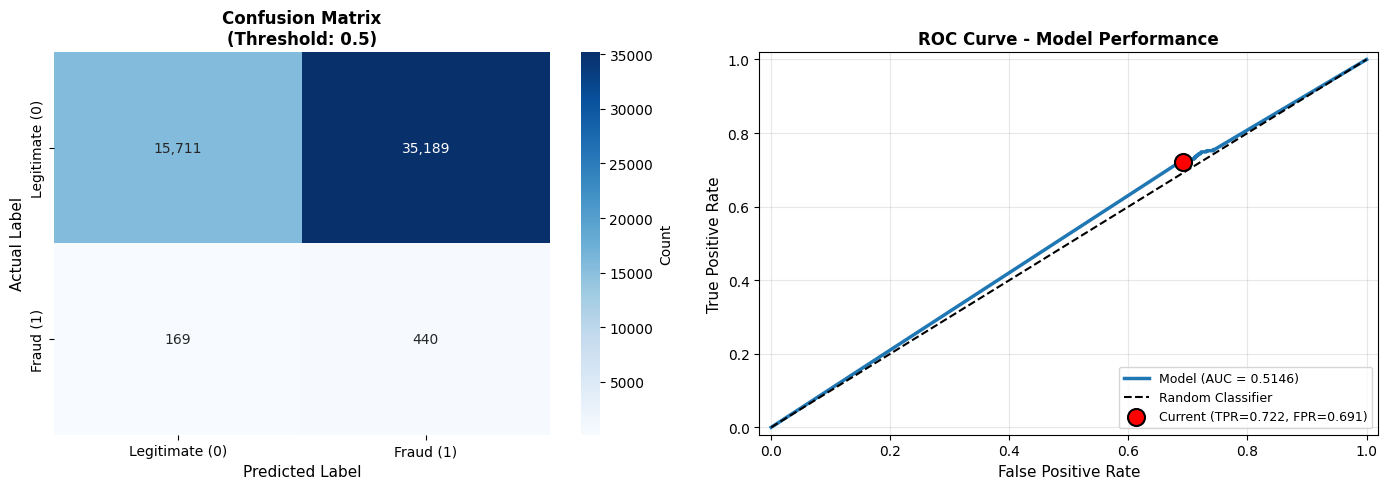

In [24]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
 )

def evaluate_fraud_detection_model(model, graph_data, mask, threshold=0.5):
    """
    ประเมินผลการทำนายของโมเดลกราฟบนชุดข้อมูลที่ระบุด้วย mask
    โดยเน้นการวิเคราะห์ค่า TPR (Recall) และกราฟ ROC
    """
    model.eval()
    device = next(model.parameters()).device
    mask = mask.to(device)
    graph_data = graph_data.to(device)

    with torch.no_grad():
        logits = model(graph_data.x, graph_data.edge_index, graph_data.edge_attr).squeeze(-1)
        probs = logits.clamp(0, 1)  # โมเดลมี sigmoid แล้ว แต่กัน numerical issue

    mask_idx = mask.cpu().numpy().astype(bool)
    y_true = graph_data.y.cpu().numpy().astype(int)[mask_idx]
    y_probs = probs.cpu().numpy()[mask_idx]
    y_pred = (y_probs > threshold).astype(int)

    print("=" * 60)
    print("CLASSIFICATION REPORT")
    print("=" * 60)
    report = classification_report(y_true, y_pred, output_dict=True, zero_division=0)
    print(classification_report(y_true, y_pred, zero_division=0))

    tpr = report['1']['recall']
    precision = report['1']['precision']
    f1 = report['1']['f1-score']

    print(f"\n{'=' * 60}")
    print("KEY METRICS FOR FRAUD DETECTION (Class 1)")
    print("=" * 60)
    print(f"TPR (Recall):     {tpr:.4f} - Fraud cases detected")
    print(f"Precision:        {precision:.4f} - Accuracy of fraud predictions")
    print(f"F1-Score:         {f1:.4f} - Harmonic mean of precision & recall")

    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    print(f"\n{'=' * 60}")
    print("CONFUSION MATRIX BREAKDOWN")
    print("=" * 60)
    print(f"True Negatives:   {tn:,} - Correctly identified legitimate")
    print(f"False Positives:  {fp:,} - Legitimate flagged as fraud")
    print(f"False Negatives:  {fn:,} - Fraud missed")
    print(f"True Positives:   {tp:,} - Correctly identified fraud")
    print(f"\nTPR (Verification): {tp / (tp + fn + 1e-8):.4f}")

    has_both_classes = len(np.unique(y_true)) > 1
    auc = roc_auc_score(y_true, y_probs) if has_both_classes else float('nan')
    if has_both_classes:
        fpr_curve, tpr_curve, thresholds = roc_curve(y_true, y_probs)
        threshold_idx = np.argmin(np.abs(thresholds - threshold))
        current_fpr = fpr_curve[threshold_idx]
        current_tpr = tpr_curve[threshold_idx]
    else:
        fpr_curve = np.array([0.0, 1.0])
        tpr_curve = np.array([0.0, 1.0])
        current_fpr = float('nan')
        current_tpr = float('nan')

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    sns.heatmap(cm, annot=True, fmt=',d', cmap='Blues',
                xticklabels=['Legitimate (0)', 'Fraud (1)'],
                yticklabels=['Legitimate (0)', 'Fraud (1)'],
                ax=axes[0], cbar_kws={'label': 'Count'})
    axes[0].set_title(f'Confusion Matrix\n(Threshold: {threshold})', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Actual Label', fontsize=11)
    axes[0].set_xlabel('Predicted Label', fontsize=11)

    axes[1].plot(fpr_curve, tpr_curve, linewidth=2.5, label=f'Model (AUC = {auc:.4f})')
    axes[1].plot([0, 1], [0, 1], 'k--', linewidth=1.5, label='Random Classifier')
    if has_both_classes:
        axes[1].scatter(current_fpr, current_tpr, color='red', s=150, zorder=5, edgecolors='black', linewidth=1.5,
                       label=f'Current (TPR={current_tpr:.3f}, FPR={current_fpr:.3f})')
    axes[1].set_xlabel('False Positive Rate', fontsize=11)
    axes[1].set_ylabel('True Positive Rate', fontsize=11)
    axes[1].set_title('ROC Curve - Model Performance', fontsize=12, fontweight='bold')
    axes[1].legend(loc='lower right', fontsize=9)
    axes[1].grid(True, alpha=0.3)
    axes[1].set_xlim([-0.02, 1.02])
    axes[1].set_ylim([-0.02, 1.02])

    plt.tight_layout()
    plt.show()

    return {
        'tpr': tpr,
        'precision': precision,
        'f1_score': f1,
        'auc': auc,
        'confusion_matrix': cm,
        'classification_report': report,
        'threshold': threshold,
        'predictions': {
            'probabilities': y_probs,
            'labels': y_pred
        }
    }

metrics = evaluate_fraud_detection_model(model, data, data.val_mask, threshold=0.5)

def find_optimal_threshold(model, graph_data, mask, min_precision=0.5):
    """ค้นหา threshold ที่ให้ค่า TPR สูงสุดภายใต้เงื่อนไข precision ขั้นต่ำ"""
    model.eval()
    device = next(model.parameters()).device
    mask = mask.to(device)
    graph_data = graph_data.to(device)

    with torch.no_grad():
        probs = model(graph_data.x, graph_data.edge_index, graph_data.edge_attr).squeeze(-1).clamp(0, 1)

    mask_idx = mask.cpu().numpy().astype(bool)
    y_true = graph_data.y.cpu().numpy().astype(int)[mask_idx]
    y_probs = probs.cpu().numpy()[mask_idx]

    best_threshold = 0.5
    best_tpr = 0.0

    for thresh in np.arange(0.1, 0.9, 0.01):
        y_pred = (y_probs > thresh).astype(int)
        report = classification_report(y_true, y_pred, output_dict=True, zero_division=0)

        if '1' in report:
            prec = report['1']['precision']
            rec = report['1']['recall']

            if prec >= min_precision and rec > best_tpr:
                best_tpr = rec
                best_threshold = thresh

    print(f"\nOptimal Threshold: {best_threshold:.3f} (TPR: {best_tpr:.4f})")
    return best_threshold

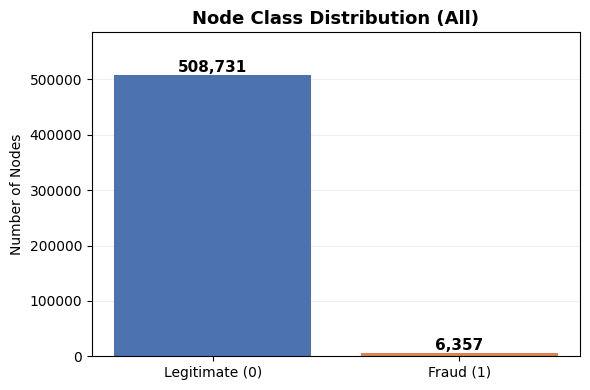

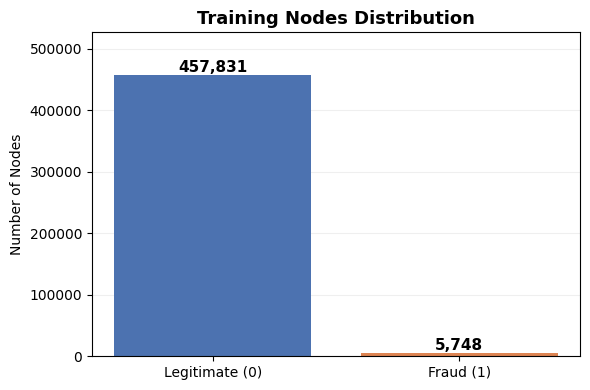

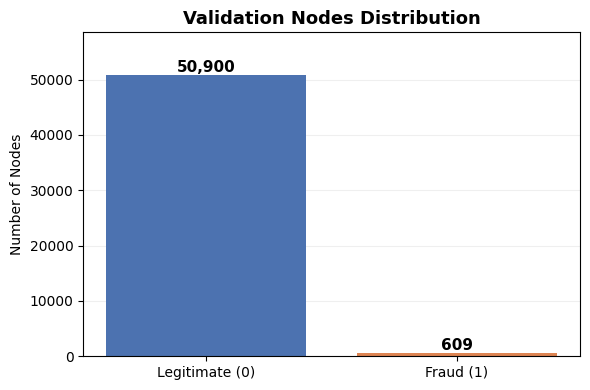

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_class_distribution(graph_data, mask=None, title='Fraud vs Legitimate Distribution'):
    """แสดงกราฟเปรียบเทียบจำนวนโหนด Fraud และ Legitimate"""
    if mask is not None:
        mask_idx = mask.cpu().numpy().astype(bool)
        labels = graph_data.y.cpu().numpy().astype(int)[mask_idx]
    else:
        labels = graph_data.y.cpu().numpy().astype(int)

    unique, counts = np.unique(labels, return_counts=True)
    category_map = {0: 'Legitimate (0)', 1: 'Fraud (1)'}
    categories = [category_map.get(val, f'Class {val}') for val in unique]

    fig, ax = plt.subplots(figsize=(6, 4))
    colors = ['#4c72b0' if val == 0 else '#dd8452' for val in unique]
    bars = ax.bar(categories, counts, color=colors)

    for bar, count in zip(bars, counts):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{count:,}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

    total = counts.sum()
    ax.set_title(title, fontsize=13, fontweight='bold')
    ax.set_ylabel('Number of Nodes')
    ax.set_ylim(0, max(counts) * 1.15)
    ax.grid(axis='y', alpha=0.2)
    ax.set_axisbelow(True)
    plt.tight_layout()
    plt.show()

# ตัวอย่างการใช้งาน
plot_class_distribution(data, title='Node Class Distribution (All)')
plot_class_distribution(data, data.train_mask, title='Training Nodes Distribution')
plot_class_distribution(data, data.val_mask, title='Validation Nodes Distribution')

## Reference
Some of the feature engineering of this repo are referenced to below papers, highly recommend to read:
1. [Weber, M., Domeniconi, G., Chen, J., Weidele, D. K. I., Bellei, C., Robinson, T., & Leiserson, C. E. (2019). Anti-money laundering in bitcoin: Experimenting with graph convolutional networks for financial forensics. arXiv preprint arXiv:1908.02591.](https://arxiv.org/pdf/1908.02591.pdf)
2. [Johannessen, F., & Jullum, M. (2023). Finding Money Launderers Using Heterogeneous Graph Neural Networks. arXiv preprint arXiv:2307.13499.](https://arxiv.org/pdf/2307.13499.pdf)